# Diet Patterns and Covid vulnerability: A Study of Dietary plans of Regions with Lower and Higher COVID-19 Cases, using Regressor Models to Optimize Diets, to boost Covid Resistance. 
dataset adapted from Maria Ren(Kaggle Datasets), COVID-19 Healthy Diet Dataset: Let's fight COVID-19 by adapting to a healthy diet!:
https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset

by: Emmanuella Agum
ID#: 13052809
Title: Machine Learning Algorithms for Solving real-world classification and clustering problems.
Individual Research Paper

## Description:

The objective of this dataset is to Identify key nutrients or food groups that may be particularly important for reducing the risk of severe infections from Covid-19. This could be done by training a machine learning model on a dataset of individuals(in this case, countries) with and without severe Covid-19 outcomes, and using their intake of specific nutrients or food groups as features to predict the outcome.

In [2]:
import numpy as np
import pandas as pd
import math
from math import log
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from collections import Counter

# Dataset loadings 

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [129]:
#load the dataset
# Fats = pd.read_csv('data/Fat_Supply_Quantity_Data.csv')
# Supply = pd.read_csv('data/Food_Supply_Quantity_kg_Data.csv')
# Calories = pd.read_csv('data/Food_Supply_kcal_Data.csv')
# Protein = pd.read_csv('data/Protein_Supply_Quantity_Data.csv')
URL_Fats = "https://raw.githubusercontent.com/Chaboddunamis/HealthyDiet/main/archive%20(3)/Fat_Supply_Quantity_Data.csv"
URL_Food_Q = "https://raw.githubusercontent.com/Chaboddunamis/HealthyDiet/main/archive%20(3)/Food_Supply_Quantity_kg_Data.csv"
URLFood_Kcal = "https://raw.githubusercontent.com/Chaboddunamis/HealthyDiet/main/archive%20(3)/Food_Supply_kcal_Data.csv"
URL_protein = "https://raw.githubusercontent.com/Chaboddunamis/HealthyDiet/main/archive%20(3)/Protein_Supply_Quantity_Data.csv"
Fats = pd.read_csv(URL_Fats)
Supply = pd.read_csv(URL_Food_Q)
calories = pd.read_csv(URLFood_Kcal)
Protein = pd.read_csv(URL_protein)

In [6]:
Fats.columns # to see all the column variables, all four datasets are presented with the same features and size

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [7]:
Fats.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,0.001035,20.695714,4.138451,0.000450,4.376548,0.953890,0.850437,0.542117,9.494279,0.056589,5.109061,0.148904,3.327555,0.261032,0.281251,0.228279,0.644379,0.004108,0.001407,0.698955,29.304396,18.571657,0.309512,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,0.009569,8.002713,3.287462,0.004039,3.183815,0.643957,0.924103,0.838286,4.666762,0.072633,3.331668,0.113060,4.663950,0.368139,0.448822,0.364437,0.700193,0.022460,0.008384,0.814828,8.002369,6.766615,0.211766,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,5.018200,0.026200,0.000000,0.990800,0.058000,0.017400,0.037300,0.906100,0.000000,0.177900,0.000000,0.064000,0.000000,0.000000,0.012400,0.000000,0.000000,0.000000,0.000000,13.098200,4.954900,0.026300,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.000000,14.885800,1.674225,0.000000,1.970150,0.411350,0.330975,0.239500,6.263575,0.010125,2.219100,0.076625,0.847225,0.043250,0.037725,0.047875,0.113700,0.000000,0.000000,0.137350,23.133050,13.812825,0.173675,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,0.000000,20.943050,3.312350,0.000000,3.306750,0.898300,0.572700,0.361400,9.259000,0.031650,4.947600,0.123550,1.688900,0.137100,0.102300,0.086250,0.390500,0.000000,0.000000,0.452400,29.060600,18.192550,0.247450,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,0.000000,26.866950,6.227575,0.000000,5.587600,1.276900,1.111625,0.577800,11.750450,0.076325,7.322750,0.188875,3.511200,0.341575,0.344075,0.212425,0.915150,0.000000,0.000000,0.914025,35.117250,23.597300,0.362925,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,17.757600,0.726800,28.563900,2.690900,2.685100,2.177800,3.383800,0.189200,0.081300,4.975600,44.981800,36.418600,1.153800,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [9]:
Diets = Fats.copy()
Diets1 = Supply.copy()
Diets2 = calories.copy()
Diets3 = Protein.copy()

# Data Cleaning and preprocessing

This section is highly required as it has to deal with the 4 consecutive datasets that have to be applied with topic at hand. Thus, there will be merging of datasets to become one for proper analysis.

In [131]:
Diets.shape

(170, 27)

In [10]:
Diets.isnull().sum()

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       6
Deaths                          6
Recovered                       6
Active        

In [11]:
# replace the missing values
Diets.replace(0.0000, np.nan, inplace=True)
Diets1.replace(0.0000, np.nan, inplace=True)
Diets2.replace(0.0000, np.nan, inplace=True)
Diets3.replace(0.0000, np.nan, inplace=True)

In [12]:
Diets.isnull().sum()


Country                           0
Alcoholic Beverages             168
Animal Products                   0
Animal fats                       0
Aquatic Products, Other         165
Cereals - Excluding Beer          0
Eggs                              0
Fish, Seafood                     0
Fruits - Excluding Wine           0
Meat                              0
Miscellaneous                    22
Milk - Excluding Butter           0
Offals                            2
Oilcrops                          0
Pulses                            7
Spices                           11
Starchy Roots                     0
Stimulants                        2
Sugar Crops                     160
Sugar & Sweeteners              162
Treenuts                          8
Vegetal Products                  0
Vegetable Oils                    0
Vegetables                        0
Obesity                           3
Undernourished                    7
Confirmed                         6
Deaths                      

In [13]:
Diets1.isnull().sum()

Country                           0
Alcoholic Beverages               3
Animal fats                       0
Animal Products                   0
Aquatic Products, Other          97
Cereals - Excluding Beer          0
Eggs                              0
Fish, Seafood                     0
Fruits - Excluding Wine           0
Meat                              0
Milk - Excluding Butter           0
Miscellaneous                    13
Offals                            1
Oilcrops                          0
Pulses                            1
Spices                            3
Starchy Roots                     0
Stimulants                        0
Sugar & Sweeteners                0
Sugar Crops                     141
Treenuts                          9
Vegetable Oils                    0
Vegetables                        0
Vegetal Products                  0
Obesity                           3
Undernourished                    7
Confirmed                         6
Deaths                      

In [14]:
Diets2.isnull().sum()

Country                           0
Alcoholic Beverages              10
Animal Products                   0
Animal fats                       2
Aquatic Products, Other         166
Cereals - Excluding Beer          0
Eggs                              0
Fish, Seafood                     1
Fruits - Excluding Wine           0
Meat                              0
Milk - Excluding Butter           0
Miscellaneous                    22
Offals                            3
Oilcrops                          0
Pulses                            6
Spices                           18
Starchy Roots                     0
Stimulants                        3
Sugar Crops                     150
Sugar & Sweeteners                0
Treenuts                         20
Vegetal Products                  0
Vegetable Oils                    0
Vegetables                        0
Obesity                           3
Undernourished                    7
Confirmed                         6
Deaths                      

In [15]:
Diets3.isnull().sum()

Country                           0
Alcoholic Beverages              13
Animal Products                   0
Animal fats                       6
Aquatic Products, Other         143
Cereals - Excluding Beer          0
Eggs                              0
Fish, Seafood                     0
Fruits - Excluding Wine           0
Meat                              0
Milk - Excluding Butter           0
Offals                            1
Oilcrops                          0
Pulses                            1
Spices                           10
Starchy Roots                     0
Stimulants                        0
Sugar Crops                     149
Sugar & Sweeteners              106
Treenuts                         14
Vegetal Products                  0
Vegetable Oils                   38
Vegetables                        0
Miscellaneous                    17
Obesity                           3
Undernourished                    7
Confirmed                         6
Deaths                      

In [16]:
#drop the high volume columns from each of the dataset and those not required
Diets.drop(columns=['Alcoholic Beverages','Aquatic Products, Other','Sugar Crops','Sugar & Sweeteners','Unit (all except Population)'], inplace=True, axis=1)


In [17]:
Diets1.drop(columns=['Alcoholic Beverages','Aquatic Products, Other','Sugar Crops','Sugar & Sweeteners','Unit (all except Population)'], inplace=True, axis=1)


In [18]:
Diets2.drop(columns=['Alcoholic Beverages','Aquatic Products, Other','Sugar Crops','Sugar & Sweeteners','Unit (all except Population)'], inplace=True, axis=1)

In [19]:
Diets3.drop(columns=['Alcoholic Beverages','Aquatic Products, Other','Sugar Crops','Sugar & Sweeteners','Unit (all except Population)'], inplace=True, axis=1)

In [20]:
Diets.isnull().sum() # apply to other datasets as well

Country                      0
Animal Products              0
Animal fats                  0
Cereals - Excluding Beer     0
Eggs                         0
Fish, Seafood                0
Fruits - Excluding Wine      0
Meat                         0
Miscellaneous               22
Milk - Excluding Butter      0
Offals                       2
Oilcrops                     0
Pulses                       7
Spices                      11
Starchy Roots                0
Stimulants                   2
Treenuts                     8
Vegetal Products             0
Vegetable Oils               0
Vegetables                   0
Obesity                      3
Undernourished               7
Confirmed                    6
Deaths                      14
Recovered                   10
Active                      11
Population                   0
dtype: int64

In [21]:
Diets.info() #applicable to other datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Animal Products           170 non-null    float64
 2   Animal fats               170 non-null    float64
 3   Cereals - Excluding Beer  170 non-null    float64
 4   Eggs                      170 non-null    float64
 5   Fish, Seafood             170 non-null    float64
 6   Fruits - Excluding Wine   170 non-null    float64
 7   Meat                      170 non-null    float64
 8   Miscellaneous             148 non-null    float64
 9   Milk - Excluding Butter   170 non-null    float64
 10  Offals                    168 non-null    float64
 11  Oilcrops                  170 non-null    float64
 12  Pulses                    163 non-null    float64
 13  Spices                    159 non-null    float64
 14  Starchy Ro

In [22]:
Diets.duplicated().sum() #applicable to the others

0

In [23]:
Diets.nunique() #applicable to the others

Country                     170
Animal Products             170
Animal fats                 169
Cereals - Excluding Beer    170
Eggs                        169
Fish, Seafood               170
Fruits - Excluding Wine     168
Meat                        170
Miscellaneous               136
Milk - Excluding Butter     169
Offals                      166
Oilcrops                    170
Pulses                      159
Spices                      154
Starchy Roots               166
Stimulants                  168
Treenuts                    161
Vegetal Products            170
Vegetable Oils              170
Vegetables                  168
Obesity                     120
Undernourished               98
Confirmed                   164
Deaths                      156
Recovered                   160
Active                      159
Population                  170
dtype: int64

In [24]:
Diets['Undernourished'] = pd.to_numeric(Diets['Undernourished'], errors='coerce') #this transformation required because of the object type of the variables within

In [25]:
# finding the Nan means of each columns; each code has to be run single-handedly, but for this report, after the achieved results, it has been truncated to one cell
Diets['Miscellaneous'].mean()
Diets['Offals'].mean()
Diets['Pulses'].mean()
Diets['Spices'].mean()
Diets['Stimulants'].mean()
Diets['Treenuts'].mean()
Diets['Obesity'].mean()
Diets['Undernourished'].mean()
Diets['Confirmed'].mean()
Diets['Deaths'].mean()
Diets['Recovered'].mean()
Diets['Active'].mean()

0.5452554126120951

In [26]:
# Applying each result from the above to its quantifier.
values = {'Miscellaneous': 0.06500135135135135, 'Offals': 0.15067678571428572,'Pulses': 0.27224171779141104, 'Spices': 0.30070817610062894,'Stimulants': 0.65205, 'Treenuts': 0.733470987654321, 'Obesity': 18.707784431137725, 'Undernourished': 14.457142857142857,'Confirmed': 2.0219723157079272, 'Deaths': 0.04138856200208834, 'Recovered': 1.4886645961714557, 'Active': 0.5452554126120951}

In [27]:
#fill Nan as values
Diets.fillna(value = values, inplace=True)

#check if the nulls have been filled
Diets.isnull().sum() # Null values have been filled with mean co-efficients

Country                     0
Animal Products             0
Animal fats                 0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Miscellaneous               0
Milk - Excluding Butter     0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

Repeat the same for the remaining 3 datasets as they all contain null values

In [28]:
Diets1['Undernourished'] = pd.to_numeric(Diets1['Undernourished'], errors='coerce')

In [29]:
Diets1['Miscellaneous'].mean()
Diets1['Offals'].mean()
Diets1['Pulses'].mean()
Diets1['Spices'].mean()
Diets1['Stimulants'].mean()
Diets1['Treenuts'].mean()
Diets1['Obesity'].mean()
Diets1['Undernourished'].mean()
Diets1['Confirmed'].mean()
Diets1['Deaths'].mean()
Diets1['Recovered'].mean()
Diets1['Active'].mean()

0.5452554126120951

In [30]:
values1 = {'Miscellaneous': 0.4798140127388535, 'Offals': 0.19457928994082838,'Pulses': 0.5403094674556213, 'Spices': 0.09264610778443114,'Stimulants': 0.20194647058823528, 'Treenuts': 0.12404037267080746, 'Obesity': 18.707784431137725, 'Undernourished': 14.457142857142857,'Confirmed': 2.0219723157079272, 'Deaths': 0.04138856200208834, 'Recovered': 1.4886645961714557, 'Active': 0.5452554126120951}

In [31]:
Diets1.fillna(value = values1, inplace=True)

Diets1.isnull().sum()

Country                     0
Animal fats                 0
Animal Products             0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Treenuts                    0
Vegetable Oils              0
Vegetables                  0
Vegetal Products            0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

In [32]:
Diets2['Undernourished'] = pd.to_numeric(Diets2['Undernourished'], errors='coerce')

In [33]:
Diets2['Animal fats'].mean()
Diets2['Fish, Seafood'].mean()
Diets2['Miscellaneous'].mean()
Diets2['Offals'].mean()
Diets2['Pulses'].mean()
Diets2['Spices'].mean()
Diets2['Stimulants'].mean()
Diets2['Treenuts'].mean()
Diets2['Obesity'].mean()
Diets2['Undernourished'].mean()
Diets2['Confirmed'].mean()
Diets2['Deaths'].mean()
Diets2['Recovered'].mean()
Diets2['Active'].mean()

0.5452554126120951

In [34]:
values2 = {'Animal fats': 1.282507738095238,'Fish, Seafood': 0.6352372781065089,'Miscellaneous': 0.18300945945945946, 'Offals': 0.1437568862275449,'Pulses': 1.1494560975609758, 'Spices': 0.2048967105263158,'Stimulants': 0.31086047904191616, 'Treenuts': 0.29650133333333334, 'Obesity': 18.707784431137725, 'Undernourished': 14.457142857142857,'Confirmed': 2.0219723157079272, 'Deaths': 0.04138856200208834, 'Recovered': 1.4886645961714557, 'Active': 0.5452554126120951}

In [35]:
Diets2.fillna(value = values2, inplace=True)

Diets2.isnull().sum()

Country                     0
Animal Products             0
Animal fats                 0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

In [36]:
Diets3['Undernourished'] = pd.to_numeric(Diets3['Undernourished'], errors='coerce')

In [37]:
Diets3['Animal fats'].mean()
Diets3['Offals'].mean()
Diets3['Pulses'].mean()
Diets3['Spices'].mean()
Diets3['Treenuts'].mean()
Diets3['Vegetable Oils'].mean()
Diets3['Miscellaneous'].mean()
Diets3['Obesity'].mean()
Diets3['Undernourished'].mean()
Diets3['Confirmed'].mean()
Diets3['Deaths'].mean()
Diets3['Recovered'].mean()
Diets3['Active'].mean()

0.5452554126120951

In [38]:
values3 = {'Animal fats': 0.11218841463414633,'Miscellaneous': 0.2020516339869281, 'Offals': 0.7780118343195267,'Pulses': 2.6718307692307692, 'Spices': 0.24629000000000004,'Vegetable Oils': 0.026793939393939398, 'Treenuts': 0.26551346153846156, 'Obesity': 18.707784431137725, 'Undernourished': 14.457142857142857,'Confirmed': 2.0219723157079272, 'Deaths': 0.04138856200208834, 'Recovered': 1.4886645961714557, 'Active': 0.5452554126120951}

In [39]:
Diets3.fillna(value = values3, inplace=True)

Diets3.isnull().sum()

Country                     0
Animal Products             0
Animal fats                 0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Miscellaneous               0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

In [40]:
Diets.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population'],
      dtype='object')

In [41]:
# This stage is to realign all the columns as similar as in each dataset (noticed misplaced columns in all datasets after the Fats dataset uploaded)
columns_order = ['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)']

Fats = Diets.reindex(columns=columns_order)
Supply = Diets1.reindex(columns=columns_order)
Calories = Diets2.reindex(columns=columns_order)
Protein = Diets3.reindex(columns=columns_order)

In [42]:
# Check for conformity
Fats.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

In [43]:
Supply.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

In [44]:
Protein.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

In [45]:
Calories.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

In [46]:
# Merging the datasets into One main dataset/frame
Diet_type_list = [Fats, Supply, Calories, Protein]

# concatenate the dataframes
Diet_type = pd.concat(Diet_type_list, axis=0, keys=('Fats', 'Supply', 'Calories', 'Protein'), names=['Categories'])

# reset the index and set the index levels in the desired order
Diet_type = Diet_type.reset_index().rename(columns={'index': 'Country'})
Diet_type = Diet_type.set_index(['Country', 'Categories'])

# check the result
print(Diet_type.head(2))

                        level_1  Animal Products  Animal fats  \
Country     Categories                                          
Afghanistan Fats              0          21.6397       6.2224   
Albania     Fats              1          32.0002       3.4172   

                        Cereals - Excluding Beer    Eggs  Fish, Seafood  \
Country     Categories                                                    
Afghanistan Fats                          8.0353  0.6859         0.0327   
Albania     Fats                          2.6734  1.6448         0.1445   

                        Fruits - Excluding Wine    Meat  Miscellaneous  \
Country     Categories                                                   
Afghanistan Fats                         0.4246  6.1244         0.0163   
Albania     Fats                         0.6418  8.7428         0.0170   

                        Milk - Excluding Butter  Offals  Oilcrops  Pulses  \
Country     Categories                                          

## EDA Exploratory Data Analysis

In [47]:
Diet_type.describe()

,level_1,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,6.800000e+02,0.0
mean,84.500000,15.851073,1.438553,13.891795,0.753608,1.557164,2.254101,6.667386,0.232469,5.118616,0.316756,1.654633,1.158460,0.211135,2.597905,0.401522,0.354882,34.148612,6.080606,2.304592,18.707784,14.457143,2.021972,0.041389,1.488665,0.545255,4.452364e+07,NaN
std,49.110047,8.542243,2.400585,8.519904,0.637224,1.975890,2.708830,4.705998,0.399520,3.968300,0.397416,2.889745,1.864708,0.312091,3.993653,0.468131,0.503018,8.542103,8.249997,2.923956,9.526554,10.391486,2.313047,0.046929,1.875369,1.292543,1.560723e+08,NaN
min,0.000000,1.623700,0.001000,0.990800,0.018800,0.017400,0.037300,0.298000,0.000500,0.096300,0.001900,0.009700,0.000800,0.000800,0.012400,0.004200,0.000600,13.098200,0.003500,0.026300,2.100000,2.500000,0.000312,0.000035,0.000306,0.000055,5.400000e+04,NaN
25%,42.000000,9.172575,0.081925,6.533875,0.271800,0.403225,0.499225,3.080125,0.038875,1.886200,0.100450,0.321200,0.172700,0.040250,0.403600,0.102850,0.077675,27.726800,0.113450,0.472825,8.600000,7.200000,0.141539,0.003318,0.114013,0.015278,2.809000e+06,NaN
50%,84.500000,14.625400,0.334800,13.386300,0.591700,0.869200,1.173850,5.363000,0.107800,4.346250,0.168200,0.727850,0.497800,0.099750,1.254450,0.251900,0.197200,35.370450,1.740250,1.168450,20.700000,14.457143,1.141525,0.022226,0.609338,0.108473,1.018150e+07,NaN
75%,127.000000,22.271225,1.701475,20.142325,1.053275,1.840350,3.025525,9.669650,0.242050,7.545150,0.344550,1.722875,1.334975,0.246290,2.829125,0.501525,0.425350,40.844500,8.425600,2.756550,25.700000,14.457143,3.307445,0.060205,2.461151,0.511314,3.278100e+07,NaN
max,169.000000,36.901800,14.937300,37.526500,3.573500,18.078900,19.302800,26.429200,3.663400,20.837800,3.501600,28.563900,18.247800,2.685100,27.712800,3.383800,4.975600,48.386400,36.418600,19.299500,45.600000,59.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09,NaN


In [48]:
Diet_type.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 680 entries, ('Afghanistan', 'Fats') to ('Zimbabwe', 'Protein')
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_1                       680 non-null    int64  
 1   Animal Products               680 non-null    float64
 2   Animal fats                   680 non-null    float64
 3   Cereals - Excluding Beer      680 non-null    float64
 4   Eggs                          680 non-null    float64
 5   Fish, Seafood                 680 non-null    float64
 6   Fruits - Excluding Wine       680 non-null    float64
 7   Meat                          680 non-null    float64
 8   Miscellaneous                 680 non-null    float64
 9   Milk - Excluding Butter       680 non-null    float64
 10  Offals                        680 non-null    float64
 11  Oilcrops                      680 non-null    float64
 12  Pulses                

In [49]:
Diet_type.shape

(680, 28)

In [50]:
Diet_type['level_1'] = Diet_type['level_1'].astype('str')

In [51]:
Diet_type.columns

Index(['level_1', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Treenuts',
       'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity',
       'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'Unit (all except Population)'],
      dtype='object')

**bivariate visuals**

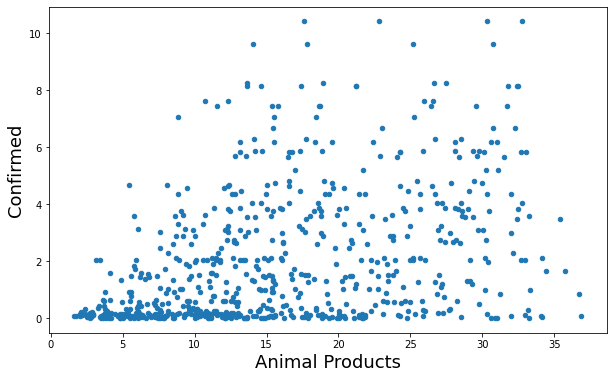

In [52]:
Diet_type.plot(kind='scatter', x='Animal Products', y='Confirmed', figsize=(10,6))
plt.xlabel('Animal Products', fontsize=18)
plt.ylabel('Confirmed', rotation=90, fontsize=18)
plt.show()

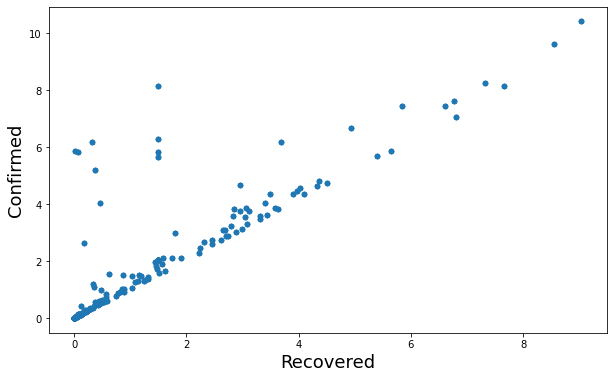

In [53]:
Diet_type.plot(kind='scatter', x='Recovered', y='Confirmed', figsize=(10,6))
plt.xlabel('Recovered', fontsize=18)
plt.ylabel('Confirmed', rotation=90, fontsize=18)
plt.show()

In [54]:
DT1= Diet_type.drop(["Confirmed","level_1","Unit (all except Population)"],axis=1)
DT2= Diet_type["Confirmed"]
DT3=pd.concat([DT1,DT2],axis=1)

In [55]:
corDT = DT3.corr()
corDT1=corDT.iloc[1:,:-1].copy()
pd.DataFrame(corDT)

,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Deaths,Recovered,Active,Population,Confirmed
Animal Products,1.000000,0.430263,-0.500902,0.653546,0.279207,-0.343415,0.841499,0.011107,0.615993,0.320689,-0.106072,-0.204135,-0.042461,-0.438565,0.472760,0.212463,-1.000000,0.071717,-0.165075,0.401594,-0.250317,0.365548,0.331433,0.266150,-0.006637,0.412767
Animal fats,0.430263,1.000000,-0.493907,0.197248,-0.227158,-0.297966,0.280892,-0.175060,0.094760,-0.247560,0.012522,-0.263169,-0.023565,-0.281123,0.369932,0.375990,-0.430210,0.515696,-0.321688,0.204393,-0.087164,0.265026,0.240524,0.125748,-0.000415,0.262309
Cereals - Excluding Beer,-0.500902,-0.493907,1.000000,-0.244805,0.048255,-0.095812,-0.374251,-0.074054,-0.336888,0.193407,-0.179621,0.374084,0.018582,0.058663,-0.285763,-0.285786,0.500975,-0.537168,-0.016898,-0.325715,0.150162,-0.239273,-0.201804,-0.197887,0.031850,-0.269079
Eggs,0.653546,0.197248,-0.244805,1.000000,0.259741,-0.283452,0.553663,-0.033307,0.316408,0.226996,-0.135718,-0.135515,0.042378,-0.361807,0.342335,0.223199,-0.653546,0.065342,-0.124139,0.305961,-0.291837,0.292585,0.290687,0.174405,0.100944,0.331325
"Fish, Seafood",0.279207,-0.227158,0.048255,0.259741,1.000000,-0.057504,0.220739,0.204446,-0.095229,0.294537,0.123573,0.099120,0.131958,-0.026996,-0.000211,-0.049276,-0.279217,-0.297854,0.007909,-0.053856,-0.119411,-0.111974,-0.101472,-0.012548,0.015154,-0.090834
Fruits - Excluding Wine,-0.343415,-0.297966,-0.095812,-0.283452,-0.057504,1.000000,-0.389944,0.311572,-0.003953,-0.191301,-0.119975,-0.085964,-0.167722,0.373586,-0.247260,-0.249169,0.343291,-0.345930,0.524588,0.058323,-0.027815,-0.022576,-0.021771,-0.028027,-0.033470,-0.031880
Meat,0.841499,0.280892,-0.374251,0.553663,0.220739,-0.389944,1.000000,-0.019832,0.215641,0.390239,0.013406,-0.112147,-0.012694,-0.380304,0.383930,0.153235,-0.841471,0.122732,-0.311251,0.303124,-0.155131,0.205898,0.157278,0.143825,-0.014220,0.204024
Miscellaneous,0.011107,-0.175060,-0.074054,-0.033307,0.204446,0.311572,-0.019832,1.000000,0.056524,-0.013061,-0.098666,-0.087474,-0.081199,0.020033,-0.042243,-0.138566,-0.011149,-0.243594,0.242158,0.115050,-0.125401,-0.039973,0.001682,0.012378,-0.005102,0.009263
Milk - Excluding Butter,0.615993,0.094760,-0.336888,0.316408,-0.095229,-0.003953,0.215641,0.056524,1.000000,0.093194,-0.287445,-0.191963,-0.132013,-0.244948,0.280260,0.047127,-0.616050,-0.132718,0.225988,0.365524,-0.198948,0.396271,0.389343,0.312268,-0.029420,0.487012
Offals,0.320689,-0.247560,0.193407,0.226996,0.294537,-0.191301,0.390239,-0.013061,0.093194,1.000000,-0.044724,0.203215,-0.021081,-0.057995,0.036325,-0.102109,-0.320678,-0.322375,-0.043753,-0.070652,0.062461,-0.053133,-0.039799,-0.076452,0.077900,-0.070658


Text(0.5, 1.0, 'Correlation Between Features')

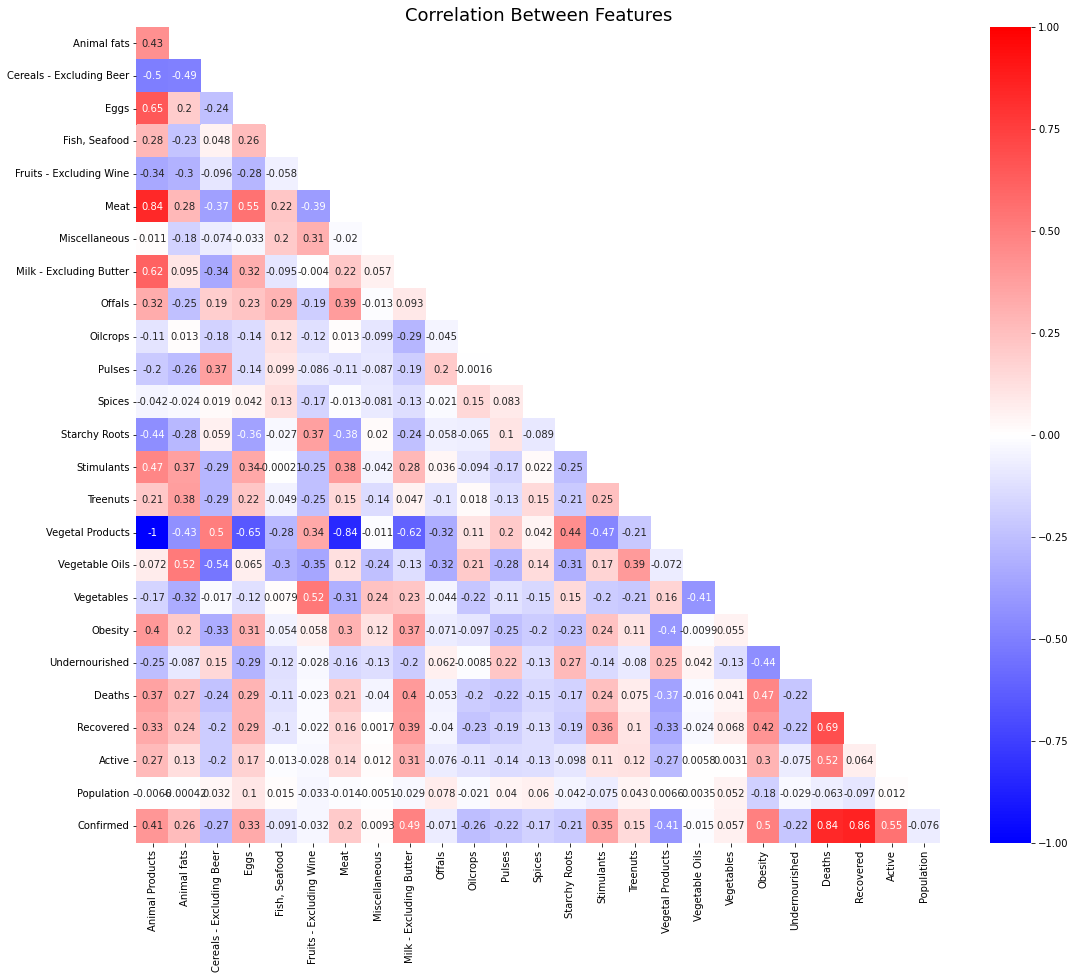

In [56]:
#correlation matrix
mask=np.triu(np.ones_like(corDT,dtype=bool))
mask=mask[1:,:-1]
cor1=corDT.iloc[1:,:-1].copy()
plt.figure(figsize=(18,15))
sns.heatmap(cor1,mask=mask,annot=True,cmap='bwr',vmin=-1,vmax=1)
plt.title('Correlation Between Features', fontsize=18)

**FEATURE ENGINEERING**

In [57]:
# Split the dataset into features and target variable
X = DT1
y = DT2


In [58]:
DT3.shape

(680, 26)

### Outlier removal

Text(0, 0.5, 'Values')

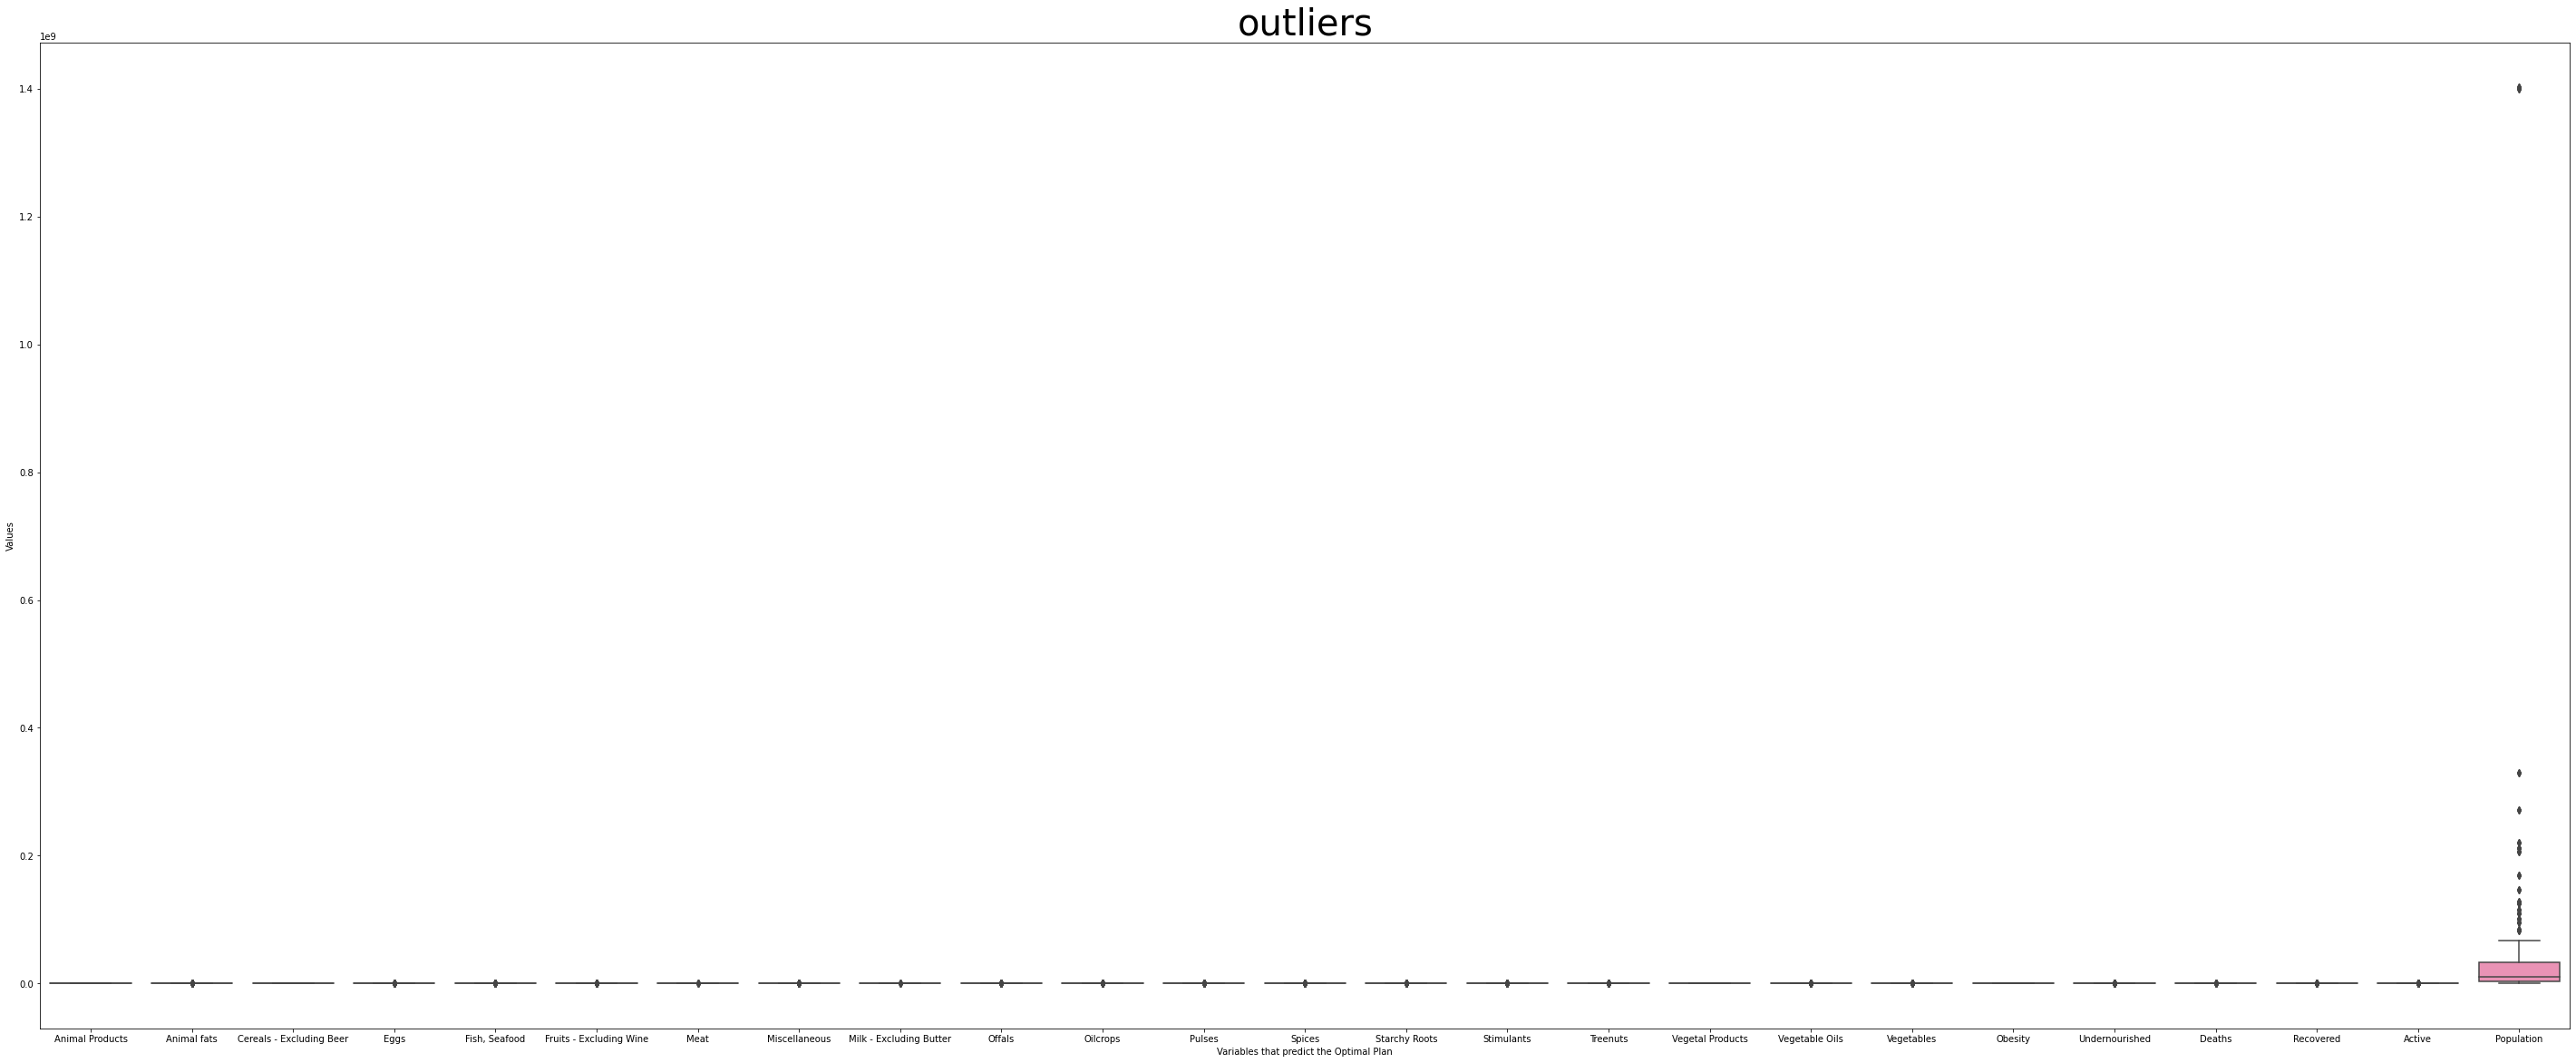

In [59]:
#data = list(df.select_dtypes(include=['int64','float64']).columns)
data = X.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(50,20))
sns.boxplot(data=data)
plt.title('outliers',fontsize=40)
plt.xlabel('Variables that predict the Optimal Plan')
plt.ylabel('Values')

In [60]:
def outlier_removal(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur
    

In [61]:
for column in X.columns:
    if X[column].dtype != 'object': 
        lr,ur=outlier_removal(X[column])
        X[column]=np.where(X[column]>ur,ur,X[column])
        X[column]=np.where(X[column]<lr,lr,X[column])

Text(0, 0.5, 'Values')

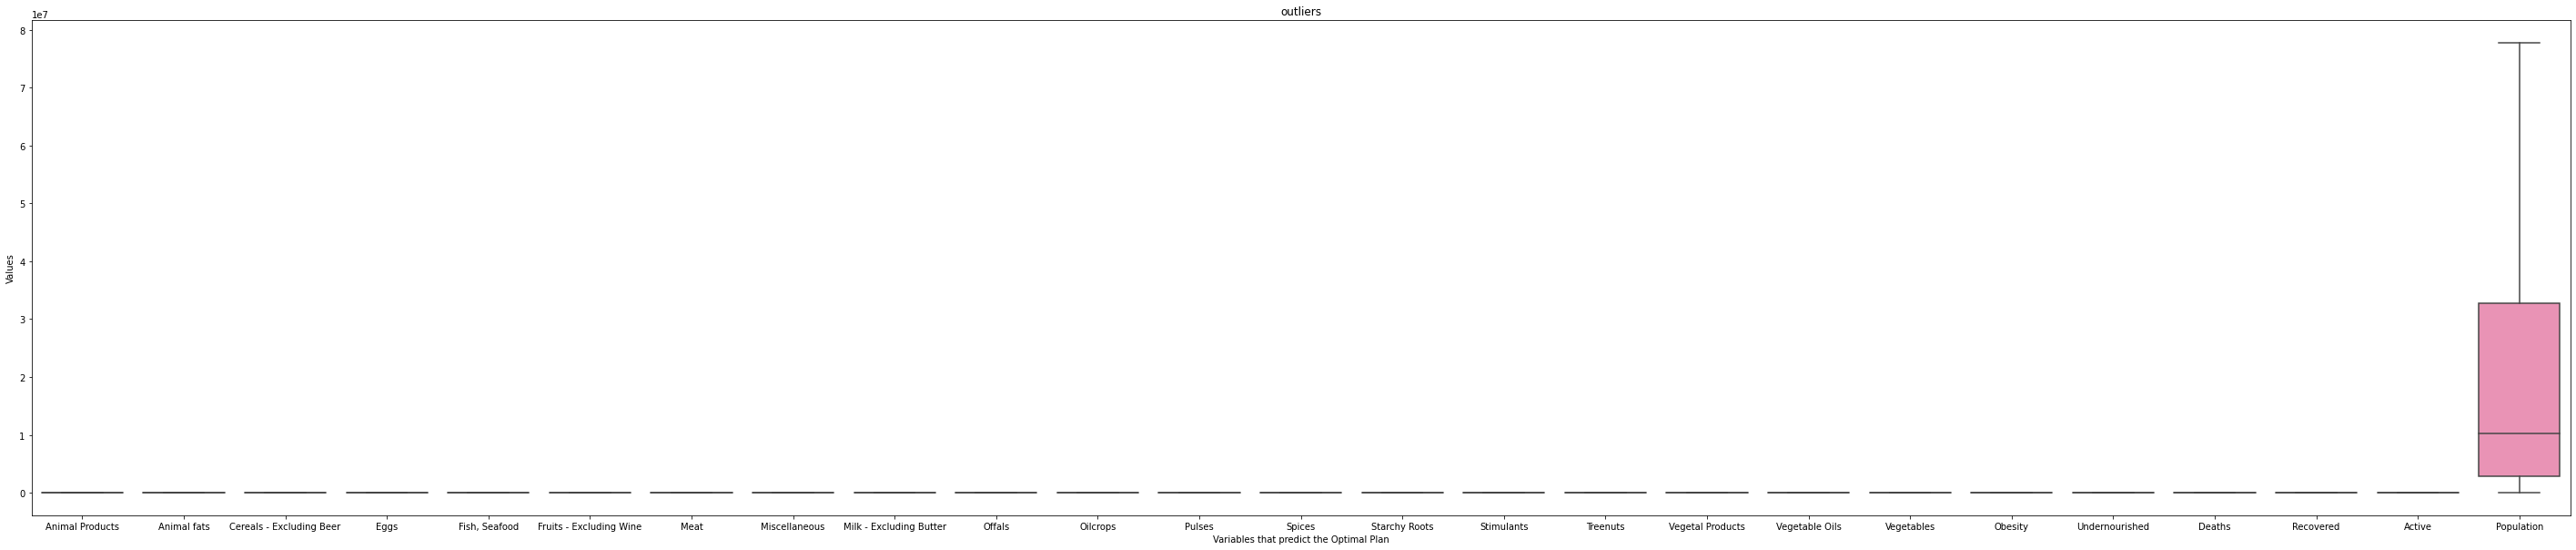

In [62]:
plt.figure(figsize=(50,10))
sns.boxplot(data=X)
plt.title('outliers')
plt.xlabel('Variables that predict the Optimal Plan')
plt.ylabel('Values')

In [63]:
DT3.head(1)

,,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Deaths,Recovered,Active,Population,Confirmed
Country,Categories,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Fats,21.6397,6.2224,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.196,0.2776,0.049,0.098,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.006186,0.123374,0.012574,38928000.0,0.142134


**NORMALIZATION/Standard Scaler/PCA vs non-PCA**

In [64]:
X = DT3.drop('Confirmed', axis=1)
y = DT3['Confirmed']

In [65]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [66]:
"X_train:"
X_train.shape

(510, 25)

In [67]:
"y_train:"
y_train.shape

(510,)

In [68]:
"X_test:"
X_test.shape

(170, 25)

In [69]:
"y_test:"
y_test.shape

(170,)

In [70]:
#Standard Scaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

In [71]:
#PCA APPLICATION
from numpy.linalg import eigh

In [72]:
cov_matrix = np.cov(X_train_std, rowvar=False)
egnvalues, egnvectors = eigh(cov_matrix)

total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

In [73]:
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis]))

In [74]:
X_train_pca = X_train_std.dot(projectionMatrix)

In [75]:
X_train_pca

array([[ 4.63555821, -0.68068378,  0.52365066, -0.02074204,  0.30793667],
       [-3.48946462, -0.8633992 , -0.31160319,  1.8087717 ,  0.27906617],
       [-0.74040291, -1.18638958,  0.36263229, -0.75691303, -0.90330177],
       ...,
       [ 4.11924798, -1.60675605,  1.81252631,  0.49121906,  0.97928601],
       [-0.89440157,  1.69928757,  0.71856552, -0.25268023,  0.2539111 ],
       [ 2.81095702, -1.58300224,  1.01024685, -0.4186217 ,  0.36690073]])

In [76]:
X_train_pca.shape

(510, 5)

In [77]:
sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [78]:
cov_matrix = np.cov(X_test_std, rowvar=False)
egnvalues, egnvectors = eigh(cov_matrix)

total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

In [79]:
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis]))

In [80]:
X_test_pca = X_test_std.dot(projectionMatrix)

In [81]:
X_test_pca

array([[-3.07426905e+00,  2.05374322e+00,  1.14191950e+00,
        -9.34667416e-01,  4.06821859e-01],
       [ 1.89712409e+00, -1.99741360e+00,  6.47562015e-01,
        -2.16698663e-01, -4.44613306e-01],
       [-1.16997919e+00,  2.25744825e+00,  1.60942761e-01,
        -5.85240010e-01,  1.72213190e+00],
       [ 1.14476109e+00, -1.80394180e+00,  5.91649431e-02,
        -5.44700335e-02, -6.75261447e-02],
       [ 1.30617452e+00,  3.48423012e+00,  8.96983620e-01,
         4.01334095e-01,  5.35353401e-02],
       [ 8.58418630e-01,  7.82067334e-01, -1.20971603e+00,
         8.34119565e-01, -1.21218416e+00],
       [ 1.90749930e-01,  6.79921470e-01, -1.81644749e+00,
         4.57013924e-01, -5.56562372e-01],
       [-3.88254153e+00, -7.91784338e-01,  8.36406318e-01,
         4.22470433e-01,  1.38324967e-01],
       [-2.49211430e+00, -7.62790711e-01, -1.49664779e+00,
         9.88342050e-01, -1.72059836e+00],
       [ 2.97342755e+00,  1.17996141e+00, -2.40411005e+00,
        -6.76542099e-03

non PCA data applique

In [82]:
#Standard Scaler (for training the data)
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled= sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [83]:
sc.mean_

array([1.62041506e+01, 1.42401937e+00, 1.37372127e+01, 7.69865098e-01,
       1.60341321e+00, 2.29790000e+00, 6.81247765e+00, 2.48860160e-01,
       5.26662235e+00, 3.27395889e-01, 1.61939922e+00, 1.05618452e+00,
       2.02106417e-01, 2.58395078e+00, 4.08091630e-01, 3.66073616e-01,
       3.37955955e+01, 5.90170244e+00, 2.33802039e+00, 1.88699566e+01,
       1.42407563e+01, 4.17868578e-02, 1.53295136e+00, 4.98863271e-01,
       4.59264392e+07])

Import the Machine learning MOdels

# Machine Learning Algorithms

### Linear Regression

This dataset contains multiple columns variables that highlighted the target due to the solution been trained to provide due to the circumstances

sklearn.linear_model.LinearRegression
Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [85]:
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [86]:
lm.intercept_ #the slope of the curve

2.0322829746316393

In [87]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Animal Products,14.738139
Animal fats,-0.238077
Cereals - Excluding Beer,-0.032508
Eggs,-0.062520
"Fish, Seafood",-0.169740
Fruits - Excluding Wine,0.000052
Meat,-0.413202
Miscellaneous,-0.000475
Milk - Excluding Butter,-0.340164
Offals,-0.032634


In [88]:
#using the trained model to make predictions on the test data(PCA)
y_predict = lm.predict(X_test_scaled)


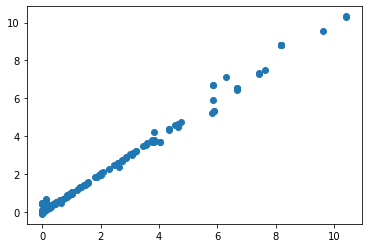

In [89]:
plt.scatter(y_test,y_predict)

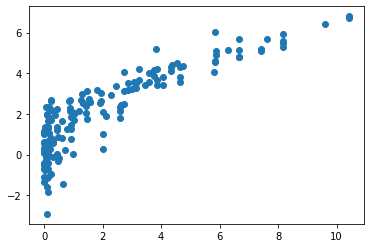

In [90]:
lm.fit(X_train_pca,y_train)
pca_predictions = lm.predict(X_test_pca)
plt.scatter(y_test,pca_predictions)

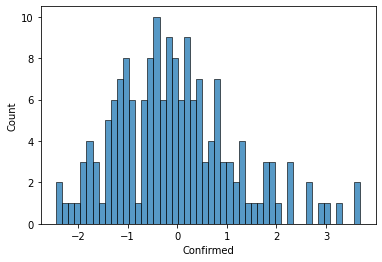

In [91]:
sns.histplot((y_test-pca_predictions),bins=50);

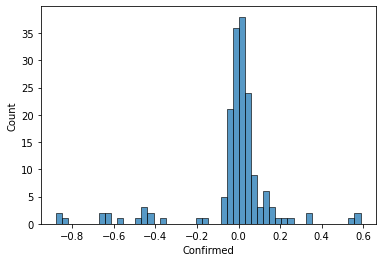

In [92]:
sns.histplot((y_test-y_predict),bins=50);

Metrics Evaluation: 
Mean Squared Error
Mean Absolute Error
Root Mean Squared Error
R-squared value

In [93]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [94]:
# evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)
print('MSE:',mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R-squared value: ", r2)

MSE: 0.042877871978108974
Mean Absolute Error:  0.102960693545503
Root Mean Squared Error:  0.2070697273338355
R-squared value:  0.9928716869897641


pca metrics

In [95]:
mse_pca = mean_squared_error(y_test, pca_predictions)
r2_pca = r2_score(y_test, pca_predictions)
mae_pca = mean_absolute_error(y_test, pca_predictions)
rmse_pca = mean_squared_error(y_test, pca_predictions, squared=False)

In [96]:
print('MAE:', mae_pca)
print('R2:', r2_pca)
print('MSE:', mse_pca)
print('RMSE:', rmse_pca)

MAE: 0.9468324316483394
R2: 0.7548767750502443
MSE: 1.4744529656827032
RMSE: 1.214270548799856


### **K-Nearest Neighbor Reggressor**

In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
# Train the model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [99]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [100]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [101]:
print("Mean Squared Error:", mse)
print('MAE:', mae)
print('RMSE:', rmse)
print("R-squared:", r2)

Mean Squared Error: 0.8777659526994906
MAE: 0.6386047172603804
RMSE: 0.9368916440546851
R-squared: 0.8540741372667864


pca metrics

In [102]:
knn2 = KNeighborsRegressor(n_neighbors=3)
knn2.fit(X_train_pca,y_train)
pred2 = knn2.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, pred2)
mae_pca = mean_absolute_error(y_test, pred2)
rmse_pca = mean_squared_error(y_test, pred2, squared=False)
r2_pca = r2_score(y_test, pred2)

print('MAE:', mae_pca)
print('R2:', r2_pca)
print('MSE:', mse_pca)
print('RMSE:', rmse_pca)

MAE: 0.6333016828507161
R2: 0.8660261012013091
MSE: 0.8058730968813534
RMSE: 0.8977043482580184


error rate

In [103]:
A = knn2.kneighbors_graph(X_train_pca)

In [104]:
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [105]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(y_test-pred_i))


Text(0, 0.5, 'Error Rate')

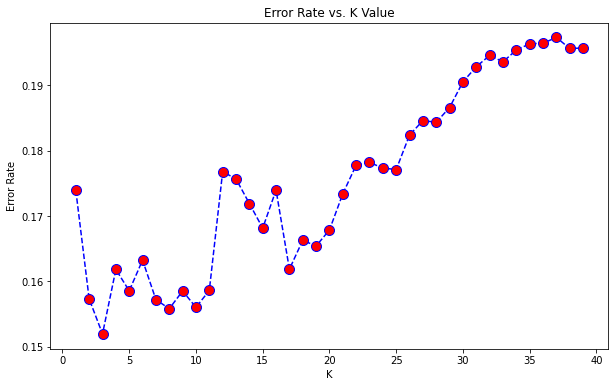

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### **Support Vector Regression**

In [107]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [108]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train_scaled, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [109]:
svpred = regr.predict(X_test_scaled)

In [110]:
from sklearn.metrics import mean_absolute_error

mae_S = mean_absolute_error(y_test, svpred)
mse_S = mean_squared_error(y_test, svpred)
rmse_S = np.sqrt(mse)
r2_S = r2_score(y_test, svpred)
print("MAE:", mae_S)
print("MSE:", mse_S)
print("RMSE:", rmse_S)
print("R-squared:", r2_S)

MAE: 0.3831121298051419
MSE: 0.45847517330745413
RMSE: 0.9368916440546851
R-squared: 0.9237799267550826


In [111]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg.fit(X_train_pca, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [112]:
svpredi = reg.predict(X_test_pca)
mae_S_pca = mean_absolute_error(y_test, svpredi)
mse_S_pca = mean_squared_error(y_test, svpredi)
rmse_S_pca = np.sqrt(mse)
r2_S_pca = r2_score(y_test, svpredi)
print('MAE:', mae_S_pca)
print('R2:', r2_S_pca)
print('MSE:', mse_S_pca)
print('RMSE:', rmse_S_pca)

MAE: 0.6784339764721332
R2: 0.8403565410306751
MSE: 0.9602793516502345
RMSE: 0.9368916440546851


In [113]:
#!pip uninstall scikit-learn -y

#!pip install -U scikit-learn #for scikit error instance

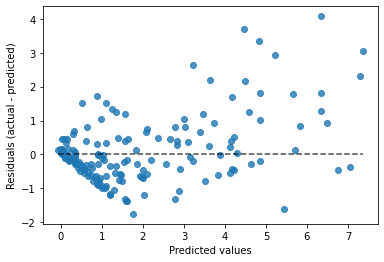

In [114]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=svpredi)
display.plot()

### **Decision Tree Regressor**

In [115]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [116]:
# Initializing a Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
dt_reg_pred = dt_reg.predict(X_test_scaled)

dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
dt_reg_rmse = np.sqrt(mse)

In [117]:
print("MAE:", dt_reg_mae)
print("MSE:", dt_reg_mse)
print("R2:", dt_reg_r2)
print("RMSE:", dt_reg_rmse)

MAE: 0.1485320787686682
MSE: 0.3350875577287041
R2: 0.9442927345241116
RMSE: 0.9368916440546851


In [118]:
dt = DecisionTreeRegressor()
dt.fit(X_train_pca, y_train)
dt_pred = dt.predict(X_test_pca)

dt_pca_mae = mean_absolute_error(y_test, dt_pred)
dt_pca_mse = mean_squared_error(y_test, dt_pred)
dtreg_pca_r2 = r2_score(y_test, dt_pred)
dtreg_pca_rmse = np.sqrt(dt_pca_mse)

print("MAE:", dt_pca_mae)
print("MSE:", dt_pca_mse)
print("R2:", dtreg_pca_r2)
print("RMSE:", dtreg_pca_rmse)

MAE: 0.9213650451540997
MSE: 1.7622190258645065
R2: 0.7070365615306571
RMSE: 1.3274859795359446


### **HYPERPARAMETER OPTIMIZATION**

In [119]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [120]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid2 = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [121]:
grid.fit(X_train_scaled,y_train)
grid2.fit(X_train_pca,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.214 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.030 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.189 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.091 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.241 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.148 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.299 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.308 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.516 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [122]:
print(grid.best_params_)
print(grid2.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [123]:
print(grid.best_estimator_)
print(grid2.best_estimator_)

SVR(C=1000, gamma=0.001)
SVR(C=100, gamma=0.01)


In [124]:
grid_predictions = grid.predict(X_test_scaled)
grid2_pred = grid2.predict(X_test_pca)

In [125]:
mae = mean_absolute_error(y_test, grid_predictions)
mse = mean_squared_error(y_test, grid_predictions)
r2 = r2_score(y_test, grid_predictions)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
print("RMSE:", rmse)

MAE: 0.11298333262873295
MSE: 0.037135623615621366
R2: 0.9938263179409276
RMSE: 0.19270605495318865


In [126]:
mae = mean_absolute_error(y_test, grid2_pred)
mse = mean_squared_error(y_test, grid2_pred)
r2 = r2_score(y_test, grid2_pred)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
print("RMSE:", rmse)

MAE: 0.5893117045879118
MSE: 0.593715601591112
R2: 0.9012966256962882
RMSE: 0.7705294294127331


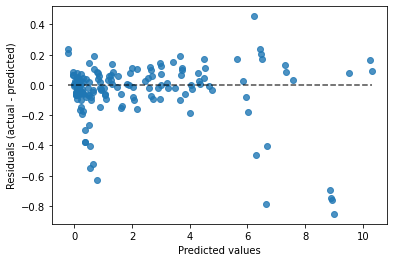

In [127]:
# Prediction Error Display
display = PredictionErrorDisplay(y_true=y_test, y_pred=grid_predictions)
display.plot()

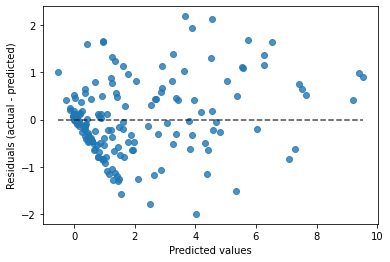

In [128]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=grid2_pred)
display.plot()